In [51]:
import requests
from bs4 import BeautifulSoup as bs         # package untuk web scrapping (beautifulsoup4)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Scrapping data tahun 2017

In [212]:
url0 = "https://www2.2019seagames.com/countries/"

data0 = requests.get(url0).content
data0 = bs(data0,'html.parser')

flatList0 = []
for i in data0.find_all('em'):
#     print(i.text)
    flatList0.append(i.text)
    
flatList0 = np.array(flatList0)
flatList0 = flatList0.reshape(22,-1)
flatList0 = flatList0[:11]
flatList0
listT0 = flatList0.T
listT0



label2017 = listT0[0]
mas =[]
for i in listT0[2]:
#     print(i[6:])
    mas.append(i[6:])
# print(mas)

gold2017 = np.array(mas)
gold2017 = gold2017.astype('int')


# DATA 2017

df2017 = pd.DataFrame(
{
    'negara' : label2017,
    'gold' : gold2017
})
df2017 # sudah sesuai urutan

,negara,gold
0,BRUNEI DARUSALLAM,0
1,CAMBODIA,3
2,INDONESIA,38
3,LAO PEOPLE’S DEMOCRATIC REPUBLIC,2
4,MALAYSIA,145
5,MYANMAR,7
6,PHILIPPINES,24
7,SINGAPORE,57
8,THAILAND,72
9,TIMOR LESTE,0


## Scrapping data 2019

In [43]:
url1 = "https://www2.2019seagames.com/medals/"

data1 = requests.get(url1).content
data1 = bs(data1,'html.parser')
iframe = data1.find_all('iframe')


url12 = iframe[0]['src']

In [175]:
url12

data12 = requests.get(url12).content
data12 = bs(data12,'html.parser')
data12

flatList =[]
for i in data12.find_all('small'):
    cek = str(i.text)
#     print(cek)
    flatList.append(cek)
# print(flatList)
flatList = np.array(flatList)
len(flatList)
flatList = flatList.reshape(12,-1)

header2019 = flatList[0]
flatList = flatList[1:]
listT = flatList.T
listT

label2019 = listT[0]
label2019
gold2019 = np.array(listT[1])
gold2019 = gold2019.astype('int')



In [213]:
# DATA 2019

df2019 = pd.DataFrame(
{
    'negara' : label2019,
    'gold' : gold2019
})
df2019 = df2019.sort_values('negara')
df2019


,negara,gold
8,BRUNEI DARUSSALAM,2
7,CAMBODIA,4
3,INDONESIA,72
9,LAO PDR,1
4,MALAYSIA,55
6,MYANMAR,4
0,PHILIPPINES,149
5,SINGAPORE,53
2,THAILAND,92
10,TIMOR-LESTE,0


In [221]:
# mencari champion

max2017 = df2017[df2017['gold'] == df2017['gold'].max()]
max2017

max2019 = df2019[df2019['gold'] == df2019['gold'].max()]
max2019

maxDF = pd.concat([max2017, max2019])
maxDF

,negara,gold
4,MALAYSIA,145
0,PHILIPPINES,149


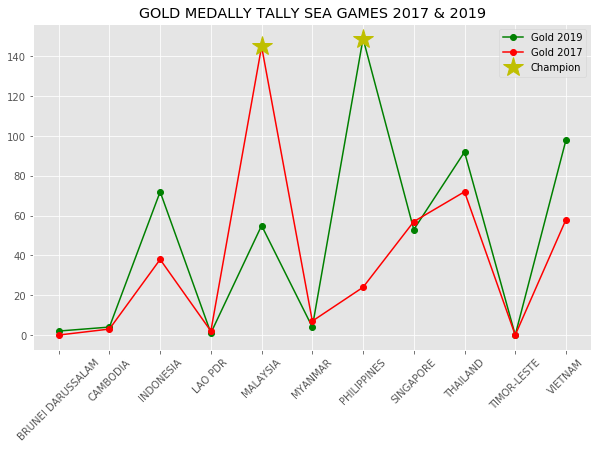

In [241]:
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(10,6))

plt.plot(df2019.negara, df2019.gold, color="g", marker='o', label="Gold 2019")
plt.plot(df2019.negara, df2017.gold, color="r", marker='o', label="Gold 2017")
plt.plot(maxDF.negara, maxDF.gold, mfc="y", mec='y', marker="*",markersize=20, linewidth=0, label="Champion")

plt.title("GOLD MEDALLY TALLY SEA GAMES 2017 & 2019")
plt.legend()
plt.xticks(rotation='45')
plt.show()

## Persentase raihan medali emas SEA Games 2017 & 2019. Tampilkan nilai persentase pada diagram lingkaran.

Text(0.5, 1.0, 'GOLD % SEA GAMES 2019')

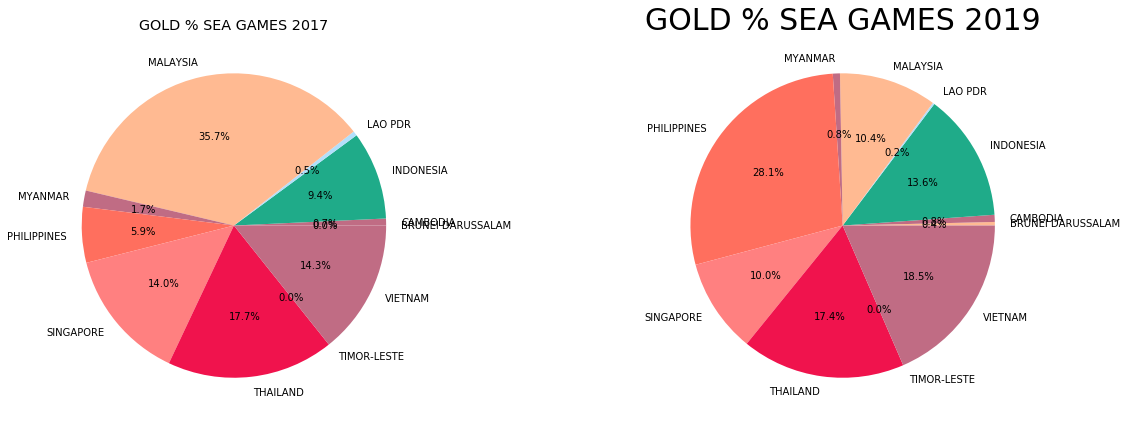

In [261]:
value = df2017.gold
label = df2019.negara



fig = plt.figure(figsize=(20,7))
ax1 = plt.subplot(121)

ax1.pie(value, labels=label,
               autopct='%1.1f%%', 
              colors=['#ffba92', '#c06c84', '#1fab89', '#b2dffb','#ffba92', '#c06c84', '#ff6f5e', '#ff8080', '#f0134d'],
               textprops = {'color':"k"}
             )
ax1.set_title("GOLD % SEA GAMES 2017", y=1)

value = df2019.gold
label = df2019.negara

ax2 = plt.subplot(122)
ax2.pie(value, labels=label,
               autopct='%1.1f%%', 
              colors=['#ffba92', '#c06c84', '#1fab89', '#b2dffb','#ffba92', '#c06c84', '#ff6f5e', '#ff8080', '#f0134d'],
               textprops = {'color':"k"}
             )
ax2.set_title('GOLD % SEA GAMES 2019',fontsize= 30)